In [1]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X.shape

(150, 2)

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
X.shape

(150, 2)

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
X_train.shape,X_test.shape

((105, 2), (45, 2))

In [9]:
np.bincount(y),np.bincount(y_train),np.bincount(y_test)

(array([50, 50, 50]), array([35, 35, 35]), array([15, 15, 15]))

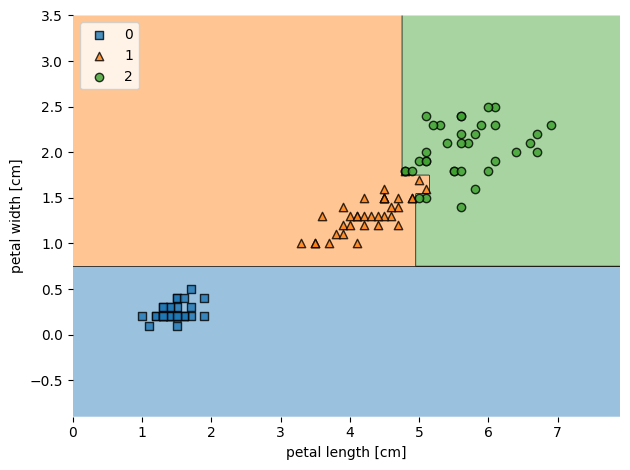

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
tree.score(X_train,y_train)

0.9904761904761905

In [12]:
tree.score(X_test,y_test)

0.9777777777777777

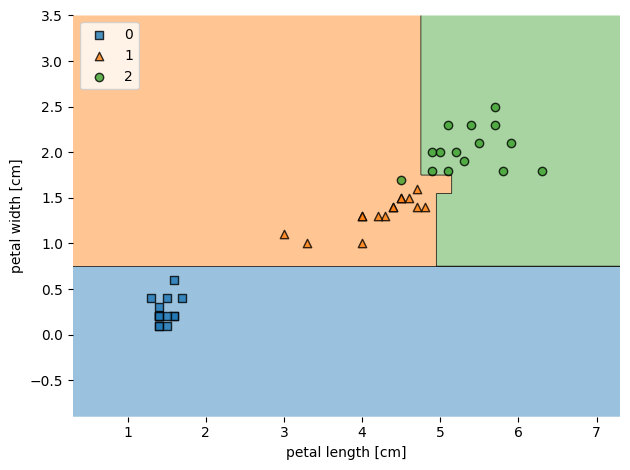

In [13]:
plot_decision_regions(X_test, y_test, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [15]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal width <= 0.75\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]\nclass = Setosa", fillcolor="#ffffff"] ;
1 [label="entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal length <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]\nclass = Versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor", fillcolor="#39e581"] ;
2 -> 3 ;
4 [label="petal length <= 5.15\nentropy = 0.544\nsamples = 40\nvalue = [0, 5, 35]\nclass = Virginica", fillcolor="#9355e9"] ;
2 -> 4 ;
5 [label="petal width <= 1.85\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = Virginica", fillcolor="#c09cf2"] ;
4 -> 5 ;
6 [label="petal w

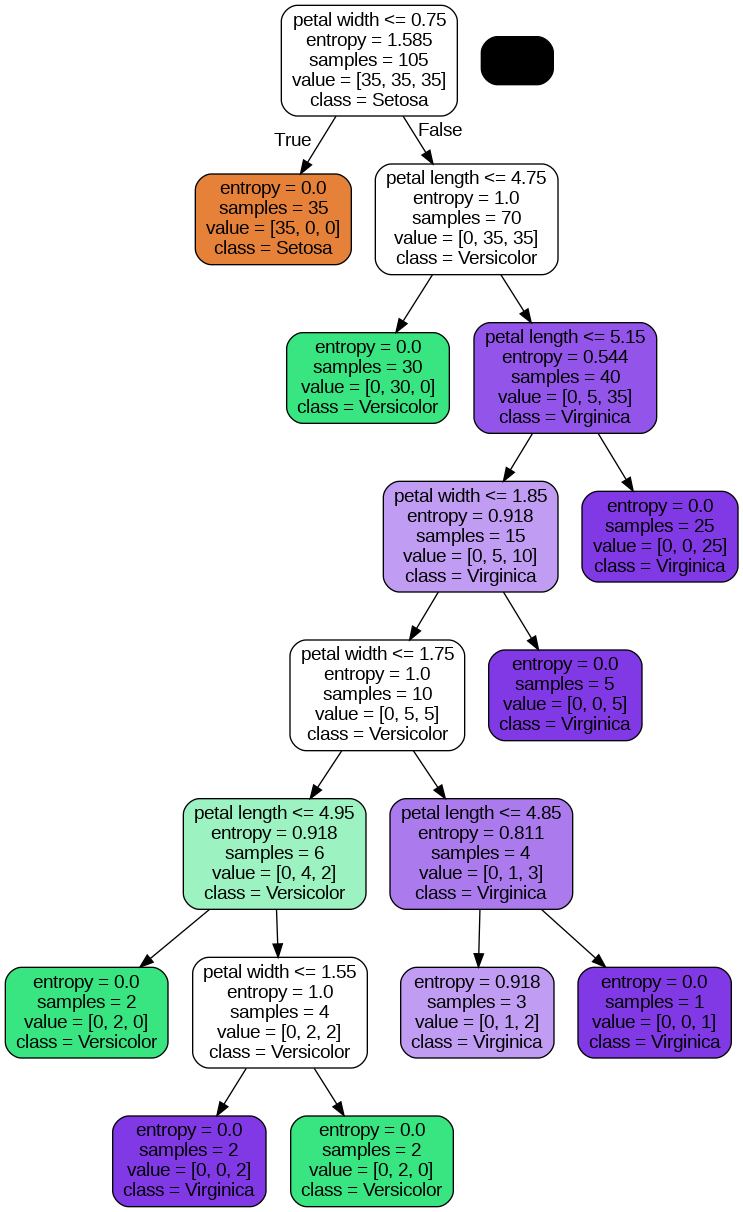

In [16]:
from IPython.display import Image

Image('tree.png')

In [17]:
tree.predict([[4.5,2.3]])

array([1])

In [ ]:
iris.target_names[tree.predict([[0.5,0.75]])]

array(['setosa'], dtype='<U10')